In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Задание 1
ИМХО, задание не совсем корректно. Нужно брать средние оценки фильма и добавлять класс к итоговой таблице фильмов, что и было реализовано

In [2]:
rate_df = pd.read_csv('ml-latest-small\\ratings.csv')

In [3]:
mv_df = pd.read_csv('ml-latest-small\\movies.csv')

In [4]:
def class_def(a):
    if a <= 2:
        return 'Low'
    elif a <=4:
        return 'Medium'
    else:
        return 'High'

In [5]:
class_df = pd.DataFrame(rate_df.groupby('movieId')['rating'].mean().apply(class_def))
class_df.columns = ['class']

In [6]:
mv_df = mv_df.merge(right = class_df, how='left', left_on='movieId', right_on='movieId')

In [7]:
mv_df.head()

,movieId,title,genres,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Medium
1,2,Jumanji (1995),Adventure|Children|Fantasy,Medium
2,3,Grumpier Old Men (1995),Comedy|Romance,Medium
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Medium
4,5,Father of the Bride Part II (1995),Comedy,Medium


## Задание 2

In [8]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

#Переводим словарь в формат regexp
geo_regexp = {}
for region in geo_data.keys():
    cities = '|'.join(geo_data[region])
    geo_regexp[region] = cities


In [9]:
#Сам классификатор
def classify(a):
    for region in geo_regexp:
        if re.search(geo_regexp[region], a):
            return region
        
    return 'undefined'

In [10]:
df = pd.read_csv('keywords.csv')
df.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [11]:
df['region'] = df['keyword'].apply(classify)

In [12]:
df.query('region != "undefined"').head()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


## Задание 3

In [13]:
def production_year(a):
    res = re.findall(r'19[5-9][0-9]', a) #search for 20-th century
    if len(res):
        return int(res[-1]) #Sometime string can contains several years, so return last of them
    
    res = re.findall('20[0-1][0-9]', a) #search for 21-th century
    if len(res):
        return int(res[-1])
    
    return 1900

In [14]:

mv_df['year'] = mv_df['title'].apply(production_year)
mv_df.head()

,movieId,title,genres,class,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Medium,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Medium,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Medium,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Medium,1995
4,5,Father of the Bride Part II (1995),Comedy,Medium,1995


In [15]:
rate_df = rate_df.merge(right = mv_df[['movieId', 'year']], how='left', left_on='movieId', right_on='movieId')
rate_df.head()

,userId,movieId,rating,timestamp,year
0,1,31,2.5,1260759144,1995
1,1,1029,3.0,1260759179,1900
2,1,1061,3.0,1260759182,1996
3,1,1129,2.0,1260759185,1981
4,1,1172,4.0,1260759205,1989


In [16]:
stat_lst = []
max_year = rate_df['year'].max()
for y in range(1950,max_year+1):
    stat_lst.append([y, rate_df[ rate_df['year'] == y]['rating'].mean()])

In [17]:
stat_df = pd.DataFrame(stat_lst, columns=['year', 'mean'])
stat_df.nlargest(10, 'mean') #На картинке нагляднее

,year,mean
7,1957,4.014241
22,1972,4.011136
2,1952,4.000000
4,1954,3.994220
1,1951,3.983539
24,1974,3.978704
12,1962,3.952446
0,1950,3.915254
27,1977,3.905786
14,1964,3.841492


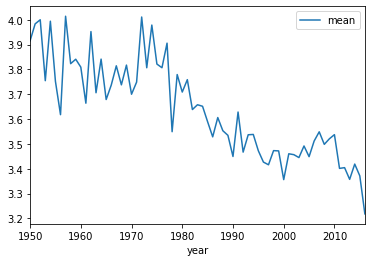

In [18]:
stat_df.plot.line(x='year', y='mean')
plt.show()

### В целом, похоже, что раньше фильмы были лучше и трава зеленее, но, возможно, проблема в том, что из старых фильмов смотрят только известные(хорошие) картины. Я бы даже сказал, что до 77 года рейтинг примерно постоянен, и только потом снижается. Думаю, на статистике мы еще вернемся к этой теме))

### Мнение супруги (изучала кино): Раньше на фильмы тратилось больше времени и средств, поэтому средний уровень был горазо выше, а сейчас выпускается огромное количество ширпотреба.